In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
bank = pd.read_excel('/content/drive/MyDrive/통계학개론_오태훈/파이썬 실습/통계학원론_오태훈_220504.xlsx',
              sheet_name='은행문제', header=1)

bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1053 entries, 0 to 1052
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   0 non-null      float64
 1   Gender       1053 non-null   int64  
 2   B_type       1053 non-null   int64  
 3   Sales        1053 non-null   int64  
 4   Age          1053 non-null   int64  
 5   Interest     1053 non-null   float64
 6   Unnamed: 6   0 non-null      float64
 7   Gender.1     12 non-null     object 
 8   Unnamed: 8   11 non-null     object 
 9   기업형태         7 non-null      object 
 10  Unnamed: 10  5 non-null      object 
 11  Unnamed: 11  1 non-null      object 
 12  Unnamed: 12  0 non-null      float64
 13  여성CEO 주장     9 non-null      object 
 14  Unnamed: 14  11 non-null     object 
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  1 non-null      object 
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unname

In [3]:
bank['Interest'].mean()

1.3033618233618243

In [17]:
bank.pivot_table(index=['Gender'], columns=['B_type'],
                 values=['Interest'],aggfunc=['mean', 'std'])

# Female : 1 / Male = 2

mean                           std                    
        Interest                      Interest                    
B_type         1         2         3         1         2         3
Gender                                                            
1       1.670645  1.609000  1.470167  0.665597  0.646245  0.619263
2       1.368025  1.159079  1.269804  0.627186  0.674383  0.674027

# -----------------------------------------------------------------------

여자승인율은 남자승인율보다 낮다.

In [18]:
bank['Gender'].value_counts()

2    952
1    101
Name: Gender, dtype: int64

In [19]:
bank_freq=pd.crosstab(bank["Gender"],columns="count")
bank_freq

col_0,count
Gender,
1,101
2,952


In [20]:
#연구문제 : 여성주장 1) 여자 승인율이 남자 승인율보다 낮다. 모수=(비율 차이)=(남자승인율-여자승인율=)\theta
#귀무가설 : 모수=0 - 남자승인율과 여자승인율이 같다.
#대립가설 : 모수>0 : 남자승인율이 여자승인율 보다 크다.
#MVUE(추정량)값
male_phat=bank['Gender'].value_counts()[2]/1050
female_phat=bank['Gender'].value_counts()[1]/115

#검정통계량(0.98)과 유의확률(0.16)
from statsmodels.stats.proportion import proportions_ztest
male_phat,female_phat, proportions_ztest([bank['Gender'].value_counts()[1],bank['Gender'].value_counts()[1]],[1050,115],alternative='larger')
#결론 : 귀무가설 채택, 남자 승인율 90.6%, 여자승인율 87.8%로 남자가 높으나 유의한 차이는 없다. 여성의 주장은 틀리다.

(0.9066666666666666, 0.8782608695652174, (-21.03117559005007, 1.0))

In [21]:
import numpy as np
x,f=np.unique(bank['Gender'],return_counts=True)
x, f

(array([1, 2]), array([101, 952]))

In [22]:
nobs=1050
count=952
phat=count/nobs
phat

# 남자 은행 대출 승인율은 90.7%이다.

0.9066666666666666

In [23]:
#표본비율
phat=f/[115,1050]
phat

array([0.87826087, 0.90666667])

# -----------------------------------------------------------------------------------------

여자 평균 대출이자율은 남자보다 높다.

In [24]:
#한글 폰트 설치
!apt -qq -y install fonts-nanum
import matplotlib.font_manager as fm
from matplotlib import rc
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' 
fontprop = fm.FontProperties(fname=font_path)
rc('font', family=fontprop.get_name(), size=16)
fm._rebuild()
#Runtime Menu -> Restart Runtime / command+ctrl=M : 런타임 다시 시작 후 처음부터 다시진행

fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.


In [25]:
#연구문제 : 여성 이자율이 평균적으로 남성 이자율보다 높다
#귀무가설 : 남자 평균 이자율과 여자 평균 이자율이 같다. mu_1=mu_2 (유의수준은 5%라고 하자.)
#대립가설 : 여자 평균 이자율은 남성 평균 이자율보다 높다.
#MVUE(추정량)값을 구하자. (여자이자율평균-남자이자율평균)
bank.groupby(by='Gender').describe()['Interest']
#bank_res=bank.groupby(by='Gender').describe()['Rate']
#bank_res.iloc[0,1]-bank_res.iloc[1,1]

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
1,101.0,1.545446,0.636721,0.1,1.1300,1.56,2.01,2.98
2,952.0,1.277679,0.667560,0.0,0.8075,1.26,1.76,3.29


In [26]:
#분산분석
import statsmodels.api as sm
from statsmodels.formula.api import ols
results=ols('Interest~C(Gender)',data=bank).fit()
sm.stats.anova_lm(results,typ=2) 

,sum_sq,df,F,PR(>F)
C(Gender),6.547025,1.0,14.81865,0.000126
Residual,464.342075,1051.0,NaN,NaN


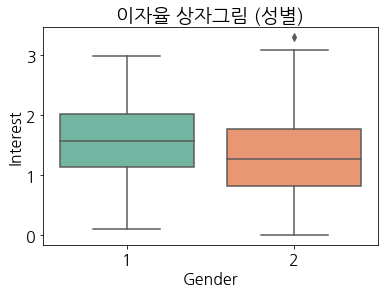

In [27]:
#이자율 : 성별 상자수염 그리기
# 여자 : 1
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
sns.boxplot(x="Gender",y="Interest",data=bank, palette="Set2")
plt.title("이자율 상자그림 (성별)")
plt.show()

In [29]:
#기초통계량
bank.groupby('Gender').describe()['Interest']

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
1,101.0,1.545446,0.636721,0.1,1.1300,1.56,2.01,2.98
2,952.0,1.277679,0.667560,0.0,0.8075,1.26,1.76,3.29


In [30]:
#여자 평균 대출 이자율은 남자보다 높다.
#귀무가설 : 여성과 남성의 이자율 차이는 없다.
#대립가설 : 여성 이자율이 남성이자율보다 높다.
#검정통계량, 유의확률(<0.001)
import scipy.stats as stat
stat.ttest_ind(bank[bank['Gender']==1]['Interest'],bank[bank['Gender']==2]['Interest'],equal_var=True)
#결론 : 귀무가설 기각되어 여자 평균 이자율 1.54, 남자의 이자율 1.27보다 유의적으로 높다.
#여성 주장 수용

Ttest_indResult(statistic=3.8495000012134235, pvalue=0.00012550183829652112)